# Optimal Bidding
This is the visual analysis of optimal bidding dataset

In [1]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [4]:
df = pd.read_csv('E:/optimal bidding/training_set/Data_Training_Set/Demand_Train_pred.csv', sep = ',', header = None)

IOError: File E:/optimal bidding/training_set/Data_Training_Set/Demand_Train_pred.csv does not exist

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
900*0.6

In [ ]:
A = np.zeros(shape=[900*24, 3])
print(A.shape)
cnt = 0
for i in range(900):
    for j in range(24):
        A[i*24+j,:] = [1,j,df.loc[i,j]]
        cnt = cnt + 1
print(cnt)

In [ ]:
df2 = pd.read_csv('E:/optimal bidding/training_set/Data_Training_Set/Demand_Train.csv', sep = ',', header = None)

In [ ]:
df2.head()

In [ ]:
Y = np.zeros(shape=[900*24,])
print(Y.shape)
cnt = 0
for i in range(900):
    for j in range(24):
        Y[i*24+j] = df2.loc[i,j]
        cnt = cnt + 1
print(cnt)

In [ ]:
print(Y[:10])

In [ ]:
model = sm.OLS(Y,A)

In [ ]:
results = model.fit()

In [ ]:
results.summary()

In [ ]:
theta = results.params
print(theta)

In [ ]:
err = 0.
for i in range(900):
    for j in range(24):
        #print(theta[0] + theta[1]*j + theta[2]*df.loc[i,j], df2.loc[i,j])
        err = err + (theta[0] + theta[1]*j + theta[2]*df.loc[i,j] - df2.loc[i,j])**2
print(err)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(A[:,2], Y, 'ro')

In [ ]:
B = np.zeros(shape=[900*24, 2])
print(A.shape)
cnt = 0
for i in range(900):
    for j in range(24):
        B[i*24+j,:] = [1,df.loc[i,j]]
        cnt = cnt + 1
print(cnt)

In [ ]:
model2 = sm.OLS(Y,B)
results2 = model2.fit()
results2.summary()

In [ ]:
theta2 = results2.params
err2 = 0.
mx = 0
for i in range(900):
    for j in range(24):
        #print(theta2[0] + theta2[1]*df.loc[i,j], df2.loc[i,j])
        mx = max(mx, abs(df.loc[i,j] - df2.loc[i,j]))
        err2 = err2 + (theta2[0] + theta2[1]*df.loc[i,j] - df2.loc[i,j])**2
print(err2, mx)

In [ ]:
plt.plot(A[:100,2], Y[:100], 'ro')

In [ ]:
df_mkt_price = pd.read_csv('E:/optimal bidding/training_set/Data_Training_Set/Price_Train_pred.csv', sep = ',', header = None)

In [ ]:
df_mkt_price.head()

In [ ]:
plt.plot(A[:24,2], 'ro')

In [ ]:
plt.plot(A[:,1],A[:,2],  'ro')

In [ ]:
'''
plt.plot(A[:24,1],Y[:24], 'bo')
plt.plot(24+A[24:48,1],Y[24:48], 'ro')
plt.plot(48+A[48:72,1],Y[48:72], 'go')
plt.plot(72+A[72:96,1],Y[72:96], 'ro')
plt.plot(96+A[72:96,1],Y[72:96], 'ro')
'''
for i in range(10):
    if i%2 == 0:
        plt.plot(i*24 + A[i*24:i*24+24,1], Y[i*24:i*24+24], 'bo')
    else:
        plt.plot(i*24 + A[i*24:i*24+24,1], Y[i*24:i*24+24], 'ro')

In [ ]:
plt.plot(A[:24,1],Y[:24], 'bo')
plt.plot(A[24:48,1],Y[24:48], 'ro')
plt.plot(A[48:72,1],Y[48:72], 'go')
plt.plot(A[72:96,1],Y[72:96], 'yo')

In [ ]:
print(theta, theta2)

In [ ]:
df_solar_pred = pd.read_csv('E:/optimal bidding/training_set/Data_Training_Set/Solar_Train_pred.csv', sep = ',', header = None)
df_solar_act = pd.read_csv('E:/optimal bidding/training_set/Data_Training_Set/Solar_Train.csv', sep = ',', header = None)

In [3]:
df_solar_act.head()

NameError: name 'df_solar_act' is not defined

In [4]:
SA = np.zeros(shape=[900*24,3])
cnt = 0
for i in range(900):
    for j in range(24):
        SA[i*24+j,:] = [1,j,df_solar_pred.loc[i,j]]
        cnt = cnt + 1
print(cnt)

NameError: name 'df_solar_pred' is not defined

In [5]:
plt.plot(SA[:,1],SA[:,2],  'ro')

NameError: name 'plt' is not defined

In [6]:
SY = np.zeros(shape=[900*24,])
cnt = 0
for i in range(900):
    for j in range(24):
        SY[i*24+j] = df_solar_act.loc[i,j]
        cnt = cnt + 1
print(cnt)

NameError: name 'df_solar_act' is not defined

In [7]:
plt.plot(SA[:,2],SY,  'ro')

NameError: name 'plt' is not defined

In [39]:
model_solar = sm.OLS(SY,SA)
results_solar = model_solar.fit()
results_solar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 8.910e+05
Date:                Fri, 29 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:06:49   Log-Likelihood:                -29886.
No. Observations:               21600   AIC:                         5.978e+04
Df Residuals:                   21597   BIC:                         5.980e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0820      0.014      6.015      0.000         0.055     0.109
x1             0.0003      0.001      0.359      0.720        -0.002     0.002
x2             0.9875      0.001   1334.660      0.000         0.986     0.989
==============================================================================
Omnibus:                     2232.650   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8256.141
Skew:                           0.488   Prob(JB):                         0.00
Kurtosis:                       5.867   Cond. No.                         32.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
theta_solar = results.params
print(theta_solar)

[ 0.89725011  0.08457196  0.97551655]


In [43]:
df_mkt_pred = pd.read_csv('E:/optimal bidding/training_set/Data_Training_Set/Price_Train_pred.csv', sep = ',', header = None)
df_mkt_act = pd.read_csv('E:/optimal bidding/training_set/Data_Training_Set/Price_Train.csv', sep = ',', header = None)

In [44]:
df_mkt_act.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.98,1.60,1.40,1.37,1.36,2.80,4.83,4.93,4.85,5.08,...,2.08,2.27,2.67,2.88,3.19,2.66,2.71,2.24,1.94,1.81
1,1.57,1.41,1.41,1.37,1.39,1.37,2.56,4.46,4.65,4.54,...,2.56,2.92,3.11,3.18,3.41,3.50,3.37,2.41,2.24,1.39
2,1.55,1.35,1.28,0.97,1.01,3.06,4.79,5.17,5.61,7.24,...,3.98,2.17,2.49,2.90,3.35,2.54,2.81,2.32,1.95,1.04
3,2.01,2.03,1.99,1.92,2.60,2.93,4.81,6.09,6.12,6.51,...,3.59,3.96,3.53,3.93,3.87,3.18,3.17,2.91,2.37,1.31
4,2.37,2.29,2.36,2.33,2.36,1.98,4.74,5.43,6.04,5.46,...,3.65,3.60,3.53,3.37,3.57,3.06,3.15,2.91,2.26,1.57


In [45]:
MA = np.zeros(shape=[900*24,3])
cnt = 0
for i in range(900):
    for j in range(24):
        MA[i*24+j,:] = [1,j,df_mkt_pred.loc[i,j]]
        cnt = cnt + 1
print(cnt)

21600


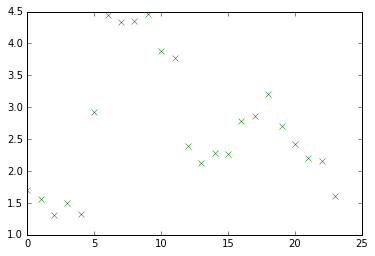

In [49]:
plt.plot(MA[:24,1],MA[:24,2],  'gx')

In [50]:
MY = np.zeros(shape=[900*24,])
cnt = 0
for i in range(900):
    for j in range(24):
        MY[i*24+j] = df_mkt_act.loc[i,j]
        cnt = cnt + 1
print(cnt)

21600


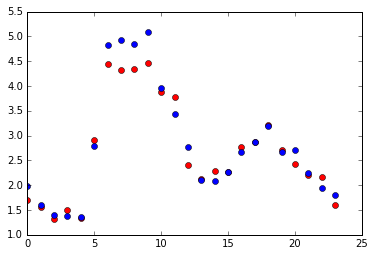

In [111]:
plt.plot(MA[:24,1],MA[:24,2],  'ro')
plt.plot(MA[:24,1],MY[:24],  'bo')

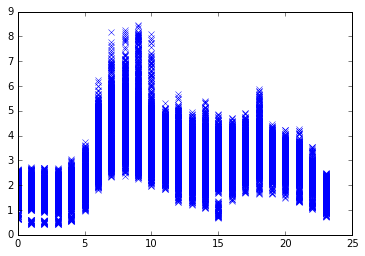

In [54]:
plt.plot(MA[:,1],MA[:,2],  'bx')

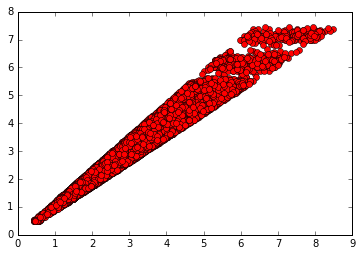

In [56]:
plt.plot(MA[:,2],MY,  'ro')

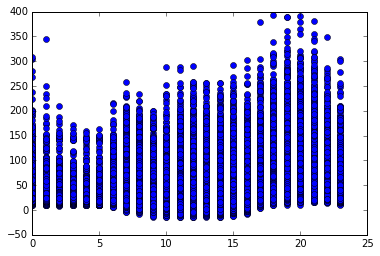

In [61]:
plt.plot(MA[:,1], Y - SY, 'bo')

In [62]:
model_market = sm.OLS(MY,MA)
results_market = model_market.fit()
results_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 2.039e+05
Date:                Fri, 29 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:10:06   Log-Likelihood:                -2087.6
No. Observations:               21600   AIC:                             4181.
Df Residuals:                   21597   BIC:                             4205.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1238      0.005     23.255      0.000         0.113     0.134
x1             0.0012      0.000      4.596      0.000         0.001     0.002
x2             0.9523      0.002    633.220      0.000         0.949     0.955
==============================================================================
Omnibus:                     1018.665   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.168
Skew:                           0.540   Prob(JB):                    8.85e-257
Kurtosis:                       3.376   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
theta_market = results_market.params
print(theta)

[ 0.89725011  0.08457196  0.97551655]


In [79]:
df_test_demand = pd.read_csv('E:/optimal bidding/test/Demand_LB_pred.csv', header = None)
df_test_market = pd.read_csv('E:/optimal bidding/test/Price_LB_pred.csv', header = None)
df_test_solar = pd.read_csv('E:/optimal bidding/test/Solar_LB_pred.csv', header = None)


In [86]:
df_test_demand.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,31.20,29.86,25.67,68.61,19.16,21.07,48.18,139.35,84.42,28.49,...,94.55,62.31,94.77,19.79,36.53,75.75,51.78,146.80,34.70,54.82
1,20.37,56.05,18.41,55.33,23.08,28.40,47.67,133.29,96.23,30.65,...,110.69,145.30,125.17,86.76,44.90,78.34,231.94,193.01,96.00,86.10
2,20.59,19.98,23.64,22.73,20.80,25.47,18.53,36.34,67.44,147.20,...,122.76,75.80,63.75,30.87,46.23,134.43,196.30,156.50,98.47,76.29
3,56.70,46.15,58.86,58.39,55.04,52.32,63.12,148.58,110.20,138.84,...,29.30,23.44,25.70,21.11,114.28,118.53,160.78,88.70,34.70,29.64
4,46.58,30.67,23.46,17.27,24.57,25.68,44.48,116.42,94.56,96.11,...,142.44,121.67,52.16,31.88,50.27,86.08,169.44,123.50,90.83,67.48


In [82]:
import csv, sys, math

In [95]:
with open('E:/optimal bidding/9.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i, row in df_test_demand.iterrows():
        for j in range(len(row)):
            mktp = np.dot(theta_market, np.array([1,j,df_test_market.loc[i,j]]))
            demp = np.dot(theta, np.array([1,j,df_test_demand.loc[i,j]]))
            solp = np.dot(theta_solar, np.array([1,j,df_test_solar.loc[i,j]]))
            writer.writerows([[7, math.ceil(max(0, demp-solp-5))]])

In [100]:
with open('E:/optimal bidding/test_actuals/demand_a.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i, row in df_test_demand.iterrows():
        l = []
        for j in range(len(row)):
            demp = np.dot(theta, np.array([1,j,df_test_demand.loc[i,j]]))
            l.append(demp)
        writer.writerows([l])

In [104]:
with open('E:/optimal bidding/test_actuals/market_a.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i, row in df_test_market.iterrows():
        l = []
        for j in range(len(row)):
            mktp = np.dot(theta_market, np.array([1,j,df_test_market.loc[i,j]]))
            l.append(mktp)
        writer.writerows([l])

In [105]:
with open('E:/optimal bidding/test_actuals/solar_a.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i, row in df_test_solar.iterrows():
        l = []
        for j in range(len(row)):
            solp = np.dot(theta_solar, np.array([1,j,df_test_solar.loc[i,j]]))
            l.append(solp)
        writer.writerows([l])

In [106]:
df_actual_demand = pd.read_csv('E:/optimal bidding/test_actuals/demand_a.csv', header = None)
df_actual_market = pd.read_csv('E:/optimal bidding/test_actuals/market_a.csv', header = None)
df_actual_solar = pd.read_csv('E:/optimal bidding/test_actuals/solar_a.csv', header = None)

In [107]:
print(len(df_actual_demand))

50


In [108]:
demand = np.zeros(shape = [50*24,])
price = np.zeros(shape = [50*24,])
solar = np.zeros(shape = [50*24,])

In [110]:
for i in range(50):
    for j in range(24):
        demand[i*24+j] = df_actual_demand.loc[i,j]
        price[i*24+j] = df_actual_market.loc[i,j]
        solar[i*24+j] = df_actual_solar.loc[i,j]


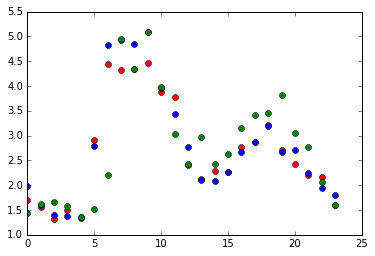

In [116]:
plt.plot(MA[24:48,1],MA[:24,2],  'ro')
plt.plot(MA[24:48,1],MY[:24],  'bo')
plt.plot(MA[24:48,1], np.dot(MA[24:48,:], theta_market), 'go')

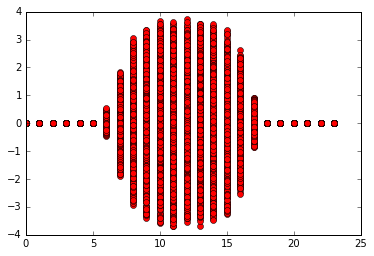

In [120]:
plt.plot(SA[:,1], SY - SA[:,2], 'ro')

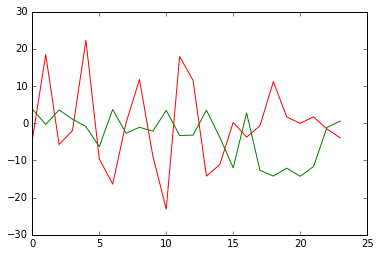

In [132]:
plt.plot(A[:24,1], Y[:24] - A[:24,2], 'r')
plt.plot(A[24:48,1], Y[24:48] - A[24:48,2], 'g')

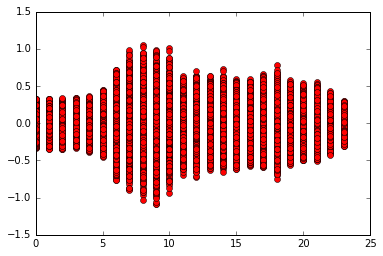

In [122]:
plt.plot(MA[:,1], MY - MA[:,2], 'ro')

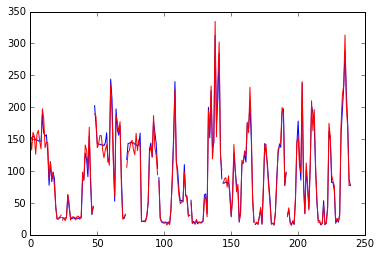

In [129]:
'''
plt.plot(A[:24,1],Y[:24], 'bo')
plt.plot(24+A[24:48,1],Y[24:48], 'ro')
plt.plot(48+A[48:72,1],Y[48:72], 'go')
plt.plot(72+A[72:96,1],Y[72:96], 'ro')
plt.plot(96+A[72:96,1],Y[72:96], 'ro')
'''
for i in range(10):
        plt.plot(i*24 + A[i*24:i*24+24,1], Y[i*24:i*24+24], 'b')
        plt.plot(i*24 + A[i*24:i*24+24,1], A[i*24:i*24+24,2], 'r')
        #plt.plot(i*24 + A[i*24:i*24+24,1], np.dot(A[i*24:i*24+24,:], theta), 'g')

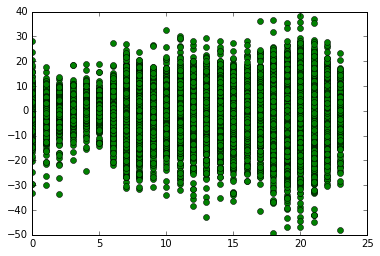

In [128]:
plt.plot(A[:,1], np.dot(A[:,:], theta) - Y, 'go')

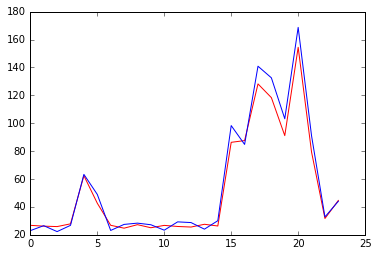

In [138]:
plt.plot(A[24:48,1], Y[24:48], 'r')
plt.plot(A[24:48,1], A[24:48,2], 'b')
# plt.plot(A[24:48,1], Y[24:48] - A[24:48,2], 'g')

In [137]:
e = np.zeros(shape=[24,])
f = np.zeros(shape=[24,])
for i in range(900):
    for j in range(24):
        e[j] = max(e[j], Y[i*24+j]-A[i*24+j,2])
        f[j] = min(f[j], Y[i*24+j]-A[i*24+j,2])
print(e)
print(f)

[ 27.94  25.38  30.29  18.15  22.27  12.25  19.34  28.55  28.87  28.    30.77
  29.31  34.63  39.23  32.27  33.63  26.19  36.03  44.48  40.86  42.82
  41.23  28.31  44.69]
[-33.96 -21.01 -17.33 -21.36 -22.11 -21.75 -31.75 -32.03 -27.66 -30.91
 -39.38 -36.05 -33.12 -34.59 -33.1  -31.75 -34.21 -41.66 -42.68 -42.59
 -45.97 -44.96 -30.97 -27.48]


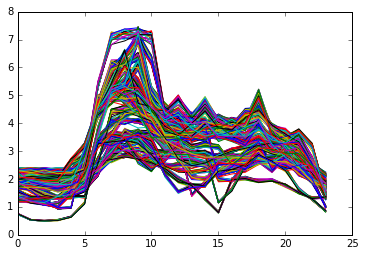

In [148]:
for i in range(900):
    plt.plot(MY[24*i:24+24*i])

In [145]:
print(len(MY), 900*24)

21600 21600


2.9069412037


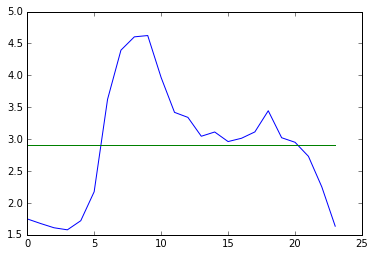

In [155]:
x = 0
A = np.zeros(shape=[24,])
for i in range(24):
    for j in range(900):
        A[i] = A[i] + MY[j*24+i]
    A[i] /= 900.
    x = x + A[i]
x = x/24
print(x)
B = np.array([x for i in range(24)])
plt.plot(A)
plt.plot(B)

6.86315


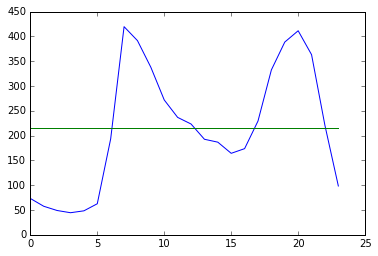

In [172]:
y = 0
D = np.zeros(shape=[24,])
E = np.zeros(shape=[24,])
for i in range(24):
    for j in range(900):
        D[i] = D[i] + SY[j*24+i]
        E[i] = E[i] + Y[j*24+i]
    D[i] /= 900.
    E[i] /= 900.
    y = y + D[i]
y = y/24
print(y)
C = np.array([y for i in range(24)])
# plt.plot(D)
# plt.plot(C)
# plt.plot(E)
plt.plot((E-D)* A)
MN = [np.mean((E-D)*A) for i in range(24)]
plt.plot(MN)